# **Introduction**

The problem consists in classifying all the blocks of the page layout of a document that has been detected by a segmentation process. This is an essential step in document analysis in order to separate text from graphic areas. Indeed,  the five classes are: text (1), horizontal line (2), picture (3), vertical line (4) and graphic (5).

The 5473 examples comes from 54 distinct documents. Each observation concerns one block. All attributes are numeric.

height:   integer.         | Height of the block

   lenght:   integer.     | Length of the block  

   area:     integer.    | Area of the block (height * lenght)

   eccen:    continuous.  | Eccentricity of the block (lenght / height)

   p_black:  continuous.  | Percentage of black pixels within the block (blackpix / area)

   p_and:    continuous.        | Percentage of black pixels after the application of the Run Length Smoothing Algorithm (RLSA) (blackand / area)

   mean_tr:  continuous.      | Mean number of white-black transitions (blackpix / wb_trans)

   blackpix: integer.    | Total number of black pixels in the original bitmap of the block

   blackand: integer.        | Total number of black pixels in the bitmap of the block after the RLSA
   
   wb_trans: integer.          | Number of white-black transitions in the original bitmap of the block

# **First imports**

We add the libraries that we are going to use during this project.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

We use pandas for data analysis because it's a great manipulation tool.  
We use seaborn for data visualization because it's great for drawing attractive and informative statistical graphics.  
We use matplotlib for creating static, animated, and interactive visualizations.  


# **Download the dataset**

We put the dataset on our GitHub account in order to read it easily with pandas.

In [2]:
url = 'https://raw.githubusercontent.com/CesarLeblanc/Python-for-Data-Analysis/main/data/dataset.csv'
data = pd.read_csv(url)

# **Health checks**

In [ ]:
print('This dataset has {} observations with {} features. \n'.format(data.shape[0], data.shape[1]))

print('The columns are :')
for i in range(len(data.columns)):
  print(' - ', data.columns[i])

print("\nLet's see the type of each observation :")
for i in range(len(data.dtypes)):
  print(' - The type of {} is {}'.format(data.columns[i], data.dtypes[i]))

This dataset has 5473 observations with 11 features. 

The columns are :
 -  height
 -  lenght
 -  area
 -  eccen
 -  p_black
 -  p_and
 -  mean_tr
 -  blackpix
 -  blackand
 -  wb_trans
 -  class

Let's see the type of each observation :
 - The type of height is int64
 - The type of lenght is int64
 - The type of area is int64
 - The type of eccen is float64
 - The type of p_black is float64
 - The type of p_and is float64
 - The type of mean_tr is float64
 - The type of blackpix is int64
 - The type of blackand is int64
 - The type of wb_trans is int64
 - The type of class is int64


In [ ]:
data.head()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [ ]:
data.tail()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
5468,4,524,2096,131.000,0.542,0.603,40.57,1136,1264,28,2
5469,7,4,28,0.571,0.714,0.929,10.00,20,26,2,1
5470,6,95,570,15.833,0.300,0.911,1.64,171,519,104,1
5471,7,41,287,5.857,0.213,0.801,1.36,61,230,45,1
5472,8,1,8,0.125,1.000,1.000,8.00,8,8,1,4


In [ ]:
data.isnull().sum()

height      0
lenght      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

We have no missing values.

In [ ]:
data.isna().sum()

height      0
lenght      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

We have no "not available" values.

In [ ]:
data.nunique()

height       104
lenght       452
area        1395
eccen       1511
p_black      711
p_and        700
mean_tr      851
blackpix    1069
blackand    1718
wb_trans     581
class          5
dtype: int64

We can see that we indeed have 5 different types of blocks (target).

In [ ]:
data.describe()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


In [3]:
data.rename(columns={'class': 'target'}, inplace=True)

We renamed 'class' into 'target' because 'class' is already used in Python.

In [ ]:
data.target.value_counts()

1    4913
2     329
5     115
4      88
3      28
Name: target, dtype: int64

In [ ]:
round(data.target.value_counts()[1] / data.target.value_counts().sum() * 100, 2)

89.77

We can see that the target 1 (which represents text) is over-represented in our dataset : they represent 90% of our observations.

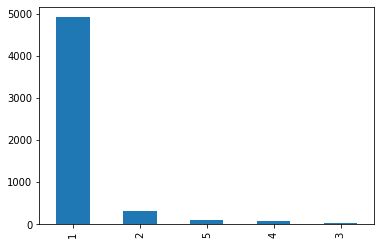

In [ ]:
data.target.value_counts().plot(kind="bar")

Let's add some colors !

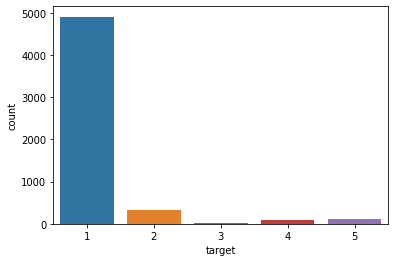

In [ ]:
sns.countplot(x=data.target, data=data)

Using a plot, we can now clearly see that the first class is over-represented in this dataset.

# **Data visualization**

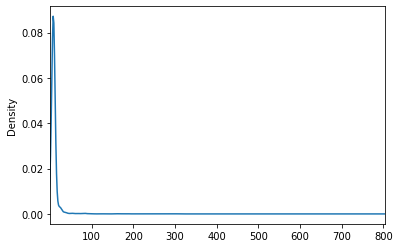

In [ ]:
data.height.plot(kind="density", xlim=(data.height.min(), data.height.max()))

We can see that most of our observations have an height inferior to 30.  
Very few of our observations have an height superior to 50.

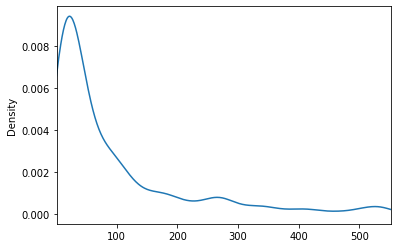

In [ ]:
data.lenght.plot(kind="density", xlim=(data.lenght.min(), data.lenght.max()))

We can see a peak in density for observations having a lenght between 20 and 50, but there is a better repartition than for height because we still have a few observations with an higher lenght.

In [ ]:
data.loc[data.area == data.area.min()]

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,target
547,1,7,7,7.000,1.0,1.0,7.0,7,7,1,2
1028,7,1,7,0.143,1.0,1.0,7.0,7,7,1,4
2911,1,7,7,7.000,1.0,1.0,7.0,7,7,1,1
4146,1,7,7,7.000,1.0,1.0,7.0,7,7,1,2
4185,1,7,7,7.000,1.0,1.0,7.0,7,7,1,1
4232,7,1,7,0.143,1.0,1.0,7.0,7,7,1,4
4305,7,1,7,0.143,1.0,1.0,7.0,7,7,1,2
4542,1,7,7,7.000,1.0,1.0,7.0,7,7,1,1
5391,7,1,7,0.143,1.0,1.0,7.0,7,7,1,4
5428,7,1,7,0.143,1.0,1.0,7.0,7,7,1,4


We have 11 blocks that have the minimal area (height x lenght) which is 7 pixels².  
Some of them have an height of 1 and a lenght of 7, and the others vice versa.

In [ ]:
data.loc[data.area == data.area.max()]

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,target
440,311,463,143993,1.489,0.088,0.16,3.93,12631,23092,3212,5


However, we have only one block that has the maximal area (height x lenght) which is 143993 pixels².

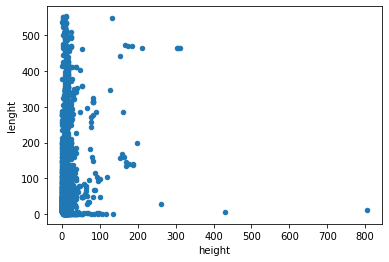

In [ ]:
data.plot(kind="scatter", x="height", y="lenght")

In [ ]:
print("The 3rd quantile of height is {} but its max value is {}.".format(int(data.quantile(q=0.75)[0]), data.height.max()))

The 3rd quantile of height is 10 but its max value is 804.


We can see that we have one outlier in the "height" features that doesn't go along with the other observations.  
Thus we remove it.

In [4]:
data = data[data.height != data.height.max()]

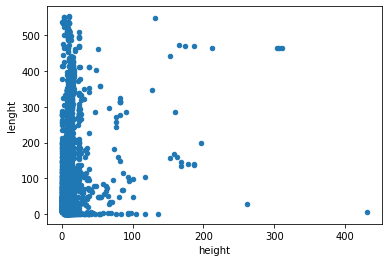

In [ ]:
data.plot(kind="scatter", x="height", y="lenght")

Now our values are better divided. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


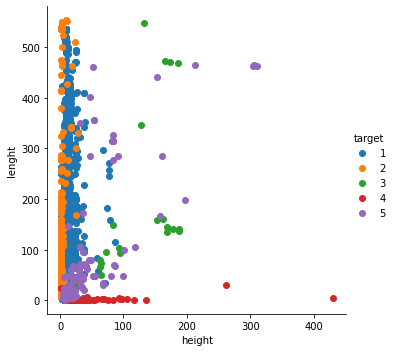

In [ ]:
sns.FacetGrid(data, hue="target", size=5) \
   .map(plt.scatter, "height", "lenght") \
   .add_legend()

We already can that for example that the class 4 has a low lenght, whereas classes 1 and 2 have low heights.  
We can even see a small linearity between height and lenght for class 3 and 5.  

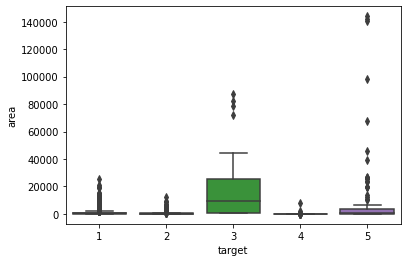

In [ ]:
sns.boxplot(x="target", y="area", data=data)

We can see that classes 3 and 5 (which represents pictures and graphics) have an area bigger than other type of blocks (which seems pretty natural).

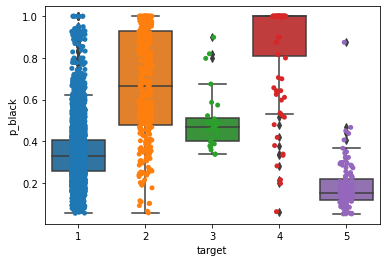

In [ ]:
ax = sns.boxplot(x="target", y="p_black", data=data)
ax = sns.stripplot(x="target", y="p_black", data=data, jitter=True, edgecolor="gray")

We decided to plot the histograms of p_black (the percentage of black pixels within the block).  
We added a layer of individual points on top of it through Seaborn's striplot.  
We used "jitter=True" so that all the points don't fall in single vertical lines above the classes.  

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


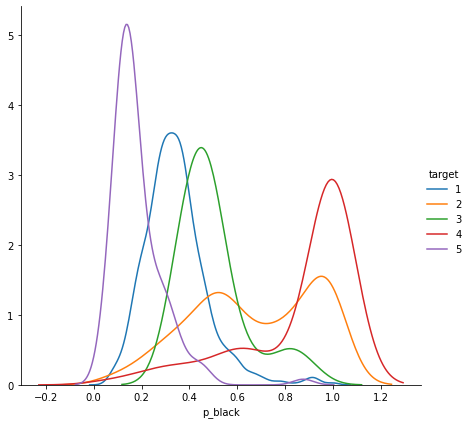

In [ ]:
sns.FacetGrid(data, hue="target", size=6) \
   .map(sns.kdeplot, "p_black") \
   .add_legend()

This plot is useful for looking at univariate relations between the classes and p_black (the percentage of black pixels within the block).  
The plot creates a kernel density estimate for p_black.

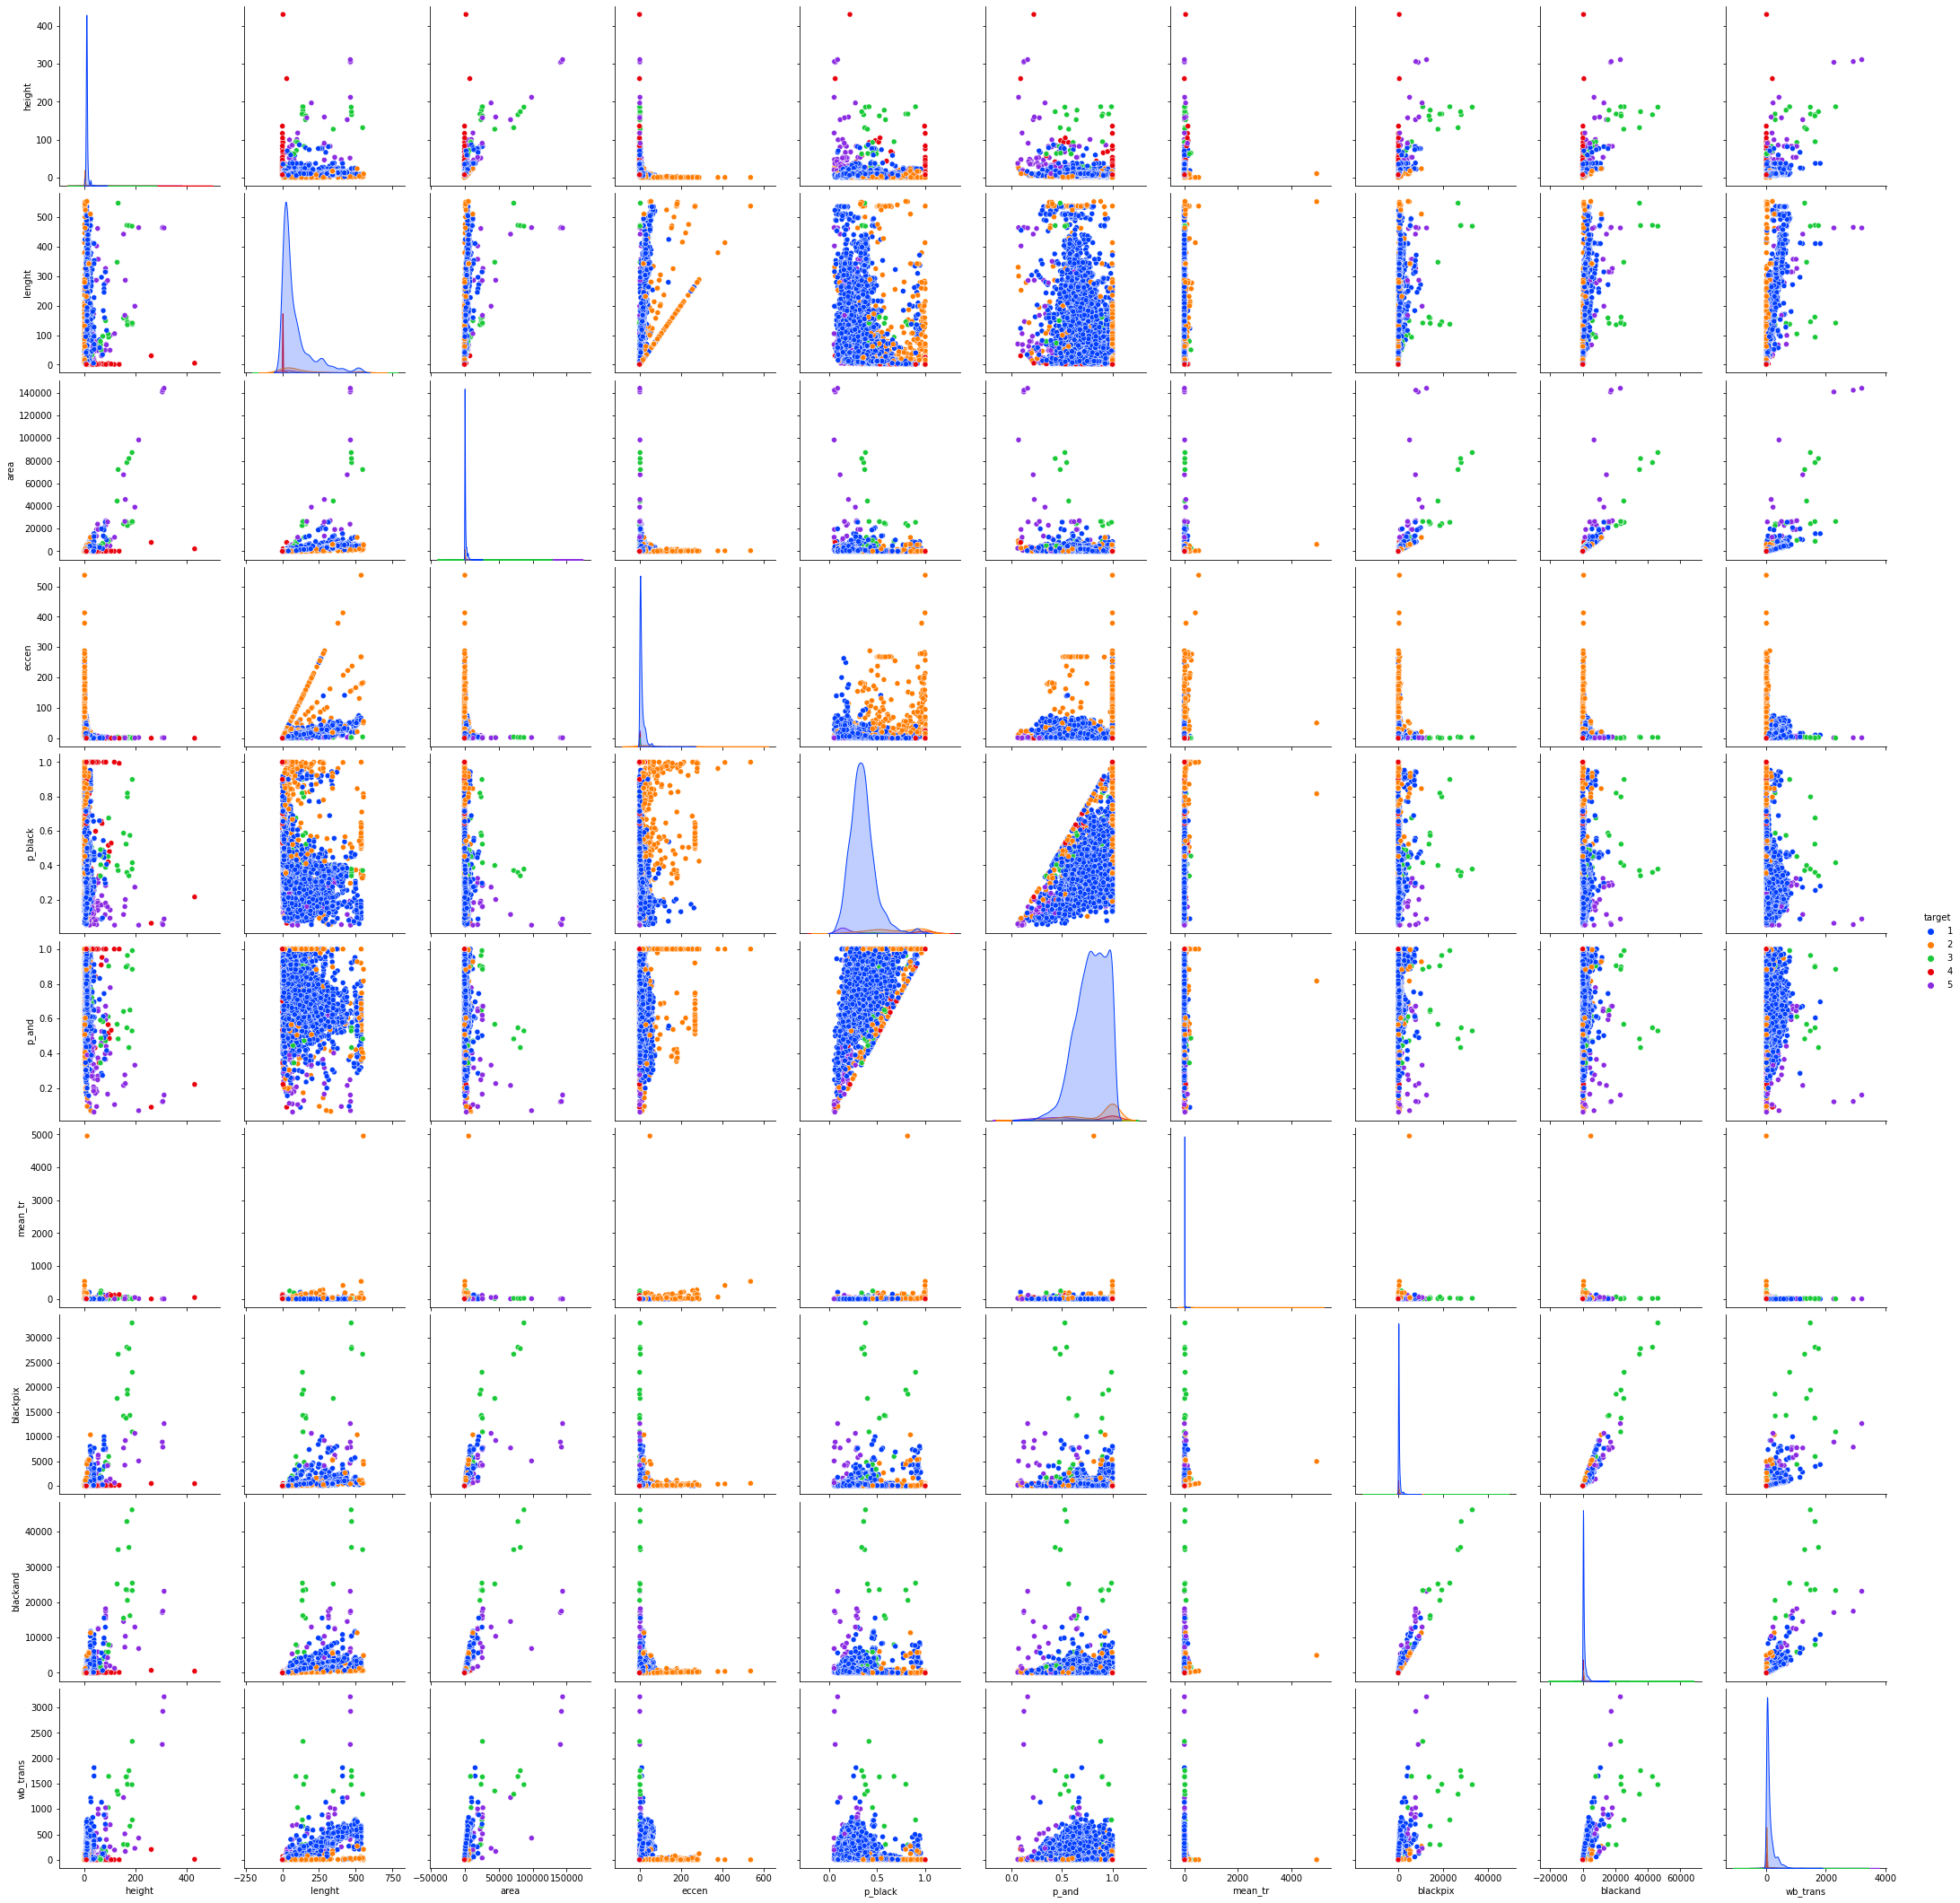

In [ ]:
sns.pairplot(data, hue="target", height=3, palette='bright')

This plot shows the bivariate relation between each pair of features.  
From the pairplot, we can see that the targets 2 and 3 (orange and green) are separated from the others across all feature combinations.

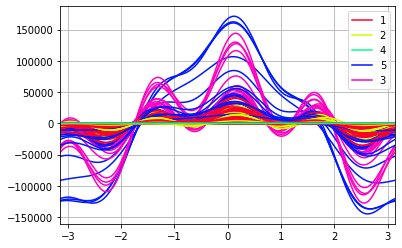

In [ ]:
pd.plotting.andrews_curves(data, "target", colormap='gist_rainbow')

This function generates a matplotlib plot of Andrews curves, for visualizing clusters of multivariate data.  
When we draw the plot and use colors to distinguish the labels, we see whether all observations are tangled with each other or whether the observations are grouped in separate streams.  

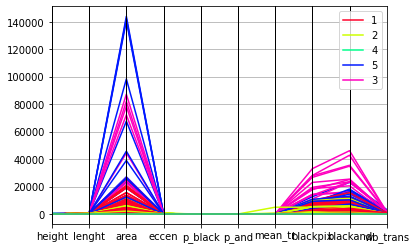

In [ ]:
pd.plotting.parallel_coordinates(data, "target", colormap='gist_rainbow')

Here we plot each feature on a separate column & then draws lines connecting the features for each data sample

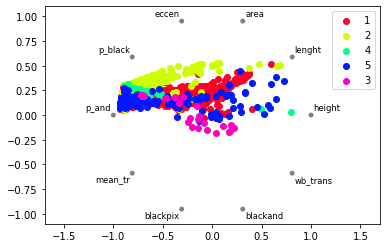

In [ ]:
pd.plotting.radviz(data, "target", colormap='gist_rainbow')

Here we put each feature as a point on a 2D plane, and then we simulate having each sample attached to those points through a spring weighted by the relative value for that feature.

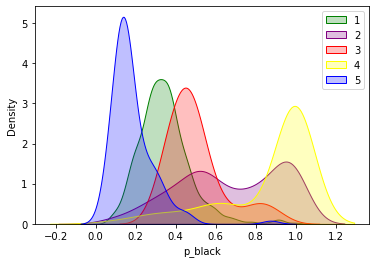

In [ ]:
plot = sns.kdeplot(data.loc[ data.target == 1, "p_black"], color="Green", shade=True)
plot = sns.kdeplot(data.loc[ data.target == 2, "p_black"], color="Purple", shade=True)
plot = sns.kdeplot(data.loc[ data.target == 3, "p_black"], color="Red", shade=True)
plot = sns.kdeplot(data.loc[ data.target == 4, "p_black"], color="Yellow", shade=True)
plot = sns.kdeplot(data.loc[ data.target == 5, "p_black"], color="Blue", shade=True)
plot.legend(["1", "2", "3", "4", "5"])

We use this to visualize the distribution of observations in a dataset according to p_black.  
For example, the class 5 (which represents a graphic) has in general the lowest p_black among all classes (and on the contrary 4 has the highest amount of p_black).

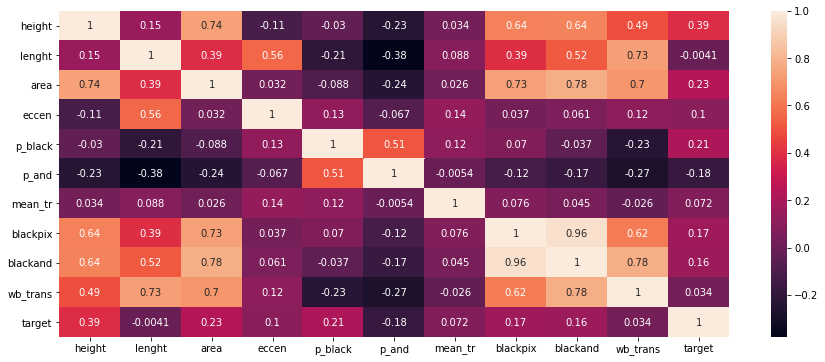

In [ ]:
plt.figure(figsize=(15,6)) 
sns.heatmap(data.corr(),annot=True) 
plt.show()

We can see that the two most correlated features are blackpix and blackand (the total number of black pixels in the original bitmap of the block and the total number of black pixels in the bitmap of the block after the RLSA) with a positive correlation of 0.96 or 96%.

We can also see that the two least correlated features are the target and the lenght (the type of the block and its lenght).

# **First step of modelling**

In [ ]:
x, y = data.drop("target", axis=1), data.target

We divide our dataset into two parts : the observations (x) and the response (y).  

In [ ]:
x.head()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4


In [ ]:
y.to_frame().head()

,target
0,1
1,1
2,1
3,1
4,1


## **Imports for modelling**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

We create a train set and a test set.  
We put 80% of our observations into training and the rest for testing.

## **Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('The accuracy of the Logistic Regression is :', round(metrics.accuracy_score(prediction,y_test),3))

The accuracy of the Logistic Regression is : 0.961


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


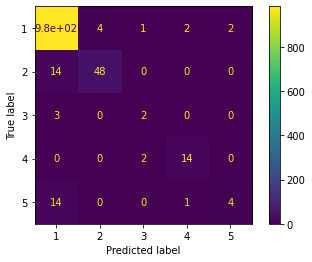

In [ ]:
plot_confusion_matrix(model, X=x_test, y_true=y_test)

In [ ]:
accuracy = (980+48+2+14+4)/(980+4+1+2+2+14+48+3+2+2+14+14+1+4)
round(accuracy,3)

0.961

We print a confusion matrix, which allows us to visualize the performance of the algorithm.  
All the values in the diagonal are correctly predicted and the others are not.  
We found the same accuracy with the confusion matrix.

## **Support Vector Machine**

In [ ]:
model = svm.SVC()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('The accuracy of the SVM is :', round(metrics.accuracy_score(prediction,y_test),3))

The accuracy of the SVM is : 0.909


## **K-Nearest Neighbours**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f9af6950940>,
 <a list of 10 Text major ticklabel objects>)

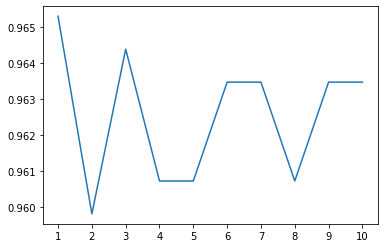

In [ ]:
neighbours=list(range(1,11))
accuracy=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for neighbour in neighbours:
    model=KNeighborsClassifier(n_neighbors=neighbour) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    accuracy=accuracy.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(neighbours, accuracy)
plt.xticks(x)

We can see that we get the best accuracy for 3 neighbours.

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the KNN is', round(metrics.accuracy_score(prediction,y_test),3))

The accuracy of the KNN is 0.964


## **Decision Tree**

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Decision Tree is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Decision Tree is 0.974


## **Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Random Forest is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Random Forest is 0.97


## **Bagging**

In [ ]:
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=1, n_estimators=20)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Random Forest is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Random Forest is 0.921


## **ADA Boosting**

In [ ]:
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the ADA Boosting is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the ADA Boosting is 0.973


For now, our best accuracy is obtained with Random Forest and Ada Boosting (between 0.96 and 0.97).

# **Second step of modelling**

## **Preprocessing**

We will do the same techniques of modelling while removing the least correlated features to the target.  
We will only do the methods with which we had the best accuracies (Decision Tree, Random Forest and Boosting).

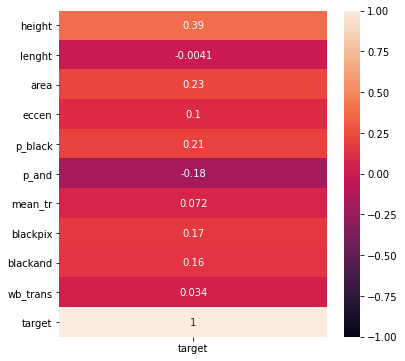

In [ ]:
plt.figure(figsize=(6,6)) 
sns.heatmap(data.corr()[['target']], annot=True, vmin=-1)
plt.show()

We remove the features lenght, mean_tr and wb_trans because they are poorly correlated to the target.

In [ ]:
x, y = data.drop(["lenght", "mean_tr", "wb_trans", "target"], axis=1), data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### **Decision Tree**

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Decision Tree is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Decision Tree is 0.97


### **Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Random Forest is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Random Forest is 0.972


### **ADA Boosting**

In [ ]:
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the ADA Boosting is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the ADA Boosting is 0.967


For this step, we obtain our best accuracy with (Random Forest) and we improve our overall acuracy.  
We conclude that it was a good idea to remove the least correlated variables to the target.

# **Third step of modelling**

## **Scaling**

In [6]:
from sklearn.preprocessing import scale

In [ ]:
scaled_data = data.drop(["lenght", "mean_tr", "wb_trans", "target"], axis=1)
scaled_data = pd.DataFrame(scale(scaled_data))

In [ ]:
scaled_data.describe()

,0,1,2,3,4,5,6
count,5.472000e+03,5.472000e+03,5.472000e+03,5.472000e+03,5.472000e+03,5.472000e+03,5.472000e+03
mean,5.382360e-16,-1.362823e-16,4.906934e-17,1.153236e-16,2.869699e-16,4.078528e-16,-1.193104e-16
std,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00,1.000091e+00
min,-5.966792e-01,-2.454498e-01,-4.478197e-01,-1.781670e+00,-4.241419e+00,-2.823862e-01,-3.900604e-01
25%,-2.128893e-01,-2.234833e-01,-3.782504e-01,-6.057982e-01,-6.226085e-01,-2.548316e-01,-3.432872e-01
50%,-1.489243e-01,-1.804783e-01,-2.797589e-01,-1.782086e-01,1.076053e-01,-2.028716e-01,-2.609027e-01
75%,-2.099436e-02,-4.475992e-02,-4.282552e-03,3.225213e-01,8.319540e-01,-6.431153e-02,-1.255302e-02
max,2.684430e+01,2.945295e+01,1.704200e+01,3.551948e+00,1.260112e+00,2.570550e+01,2.412653e+01


Now we can see that the mean of every features is now equal to 0 and their standard deviations are equal to 1 : our variables are standardized.  
We also removed the same features than before.

In [ ]:
x, y = scaled_data, data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### **Decision Tree**

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Decision Tree is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Decision Tree is 0.968


### **Random Forest**

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Random Forest is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Random Forest is 0.973


### **ADA Boosting**

In [ ]:
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the ADA Boosting is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the ADA Boosting is 0.974


For this step we achieve our best accuracy with Boosting.  
Our overall accuracy increased so it was worth it to scale the features.

# **Fourth step of modelling**

## **Tuning hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

We will tune our hyperparameters for the three models that worked best for us so far : Decision Tree, Random Forest and ADA Boosting.  
We remove the least correlated variables to the target like in step 2.  
We will also scale the variables since it increased our accuracy in step 3.

In [ ]:
scaled_data = data.drop(["lenght", "mean_tr", "wb_trans", "target"], axis=1)
scaled_data = pd.DataFrame(scale(scaled_data))

In [ ]:
x, y = scaled_data, data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### **Decision Tree**

In [ ]:
param_grid_tree={
    "max_depth" : np.arange(1, 10, 1),
    "min_samples_split": np.arange(2, 20, 3),
}

We choose the parameters according to our model.  
We select randomly a max_depth and a min_samples_split.

In [ ]:
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid_tree,
    scoring="accuracy",
    cv=KFold(5, shuffle=True)
)

We create our grid search based on accuracy because it's a classification problem.

In [ ]:
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             par

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

We check what is the best estimator possible and we create our model based on that.

In [ ]:
model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Decision Tree is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Decision Tree is 0.969


### **Random Forest**

We do the same steps than for Decision Tree but for a Random Forest model.  
Thus the parameters of or grid search change.

In [ ]:
param_grid_random={
    "max_depth" : np.arange(1, 10, 1),
    'n_estimators': np.arange(200, 700, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [ ]:
grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid_random,
    scoring="accuracy",
    cv=KFold(5, shuffle=True)
)

In [ ]:
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
    

In [ ]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Random Forest is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the Random Forest is 0.973


### **ADA Boosting**

We do the same steps than for Decision Tree and Random Forest but for a Boosting model.
Thus the parameters of or grid search change.

In [ ]:
param_grid_ada={
    'n_estimators': np.arange(10,300,10),
    'learning_rate': [0.01, 0.05, 0.1, 1],
}

In [ ]:
grid = GridSearchCV(
    estimator=AdaBoostClassifier(),
    param_grid=param_grid_ada,
    scoring="accuracy",
    cv=KFold(5, shuffle=True)
)

In [ ]:
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=10, random_state=None)

In [ ]:
model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=10, random_state=None)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the ADA Boosting is', round(metrics.accuracy_score(prediction,y_test), 3))

The accuracy of the ADA Boosting is 0.942


# **Fifth step of modelling**

## **Cross validation**

For our last step of modelling we will use cross validation by splitting our dataset not only in 2 sets (train and test) but by splitting our dataset, fitting a model and then computing the accuracy 10 different times with different splits each time.  
  
We will also did the same things than on steps 2, 3 and 4 meaning that we remove the least correlated variables, we scale our features and we tune the hyperparameters.

In [8]:
scaled_data = data.drop(["lenght", "mean_tr", "wb_trans", "target"], axis=1)
scaled_data = pd.DataFrame(scale(scaled_data))
x, y = scaled_data, data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
from sklearn.model_selection import cross_val_score

### **Decision Tree**

In [9]:
decision_tree_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
decision_tree_model.fit(x_train,y_train)
scores = cross_val_score(decision_tree_model, x, y, cv=10)
score_decision_tree = max(np.round(scores, 3))
print("We obtain a maximal accuracy of :", score_decision_tree)

We obtain a maximal accuracy of : 0.976


### **Random Forest**

In [10]:
random_forest_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
random_forest_model.fit(x_train,y_train)
scores = cross_val_score(random_forest_model, x, y, cv=10)
score_random_forest = max(np.round(scores, 3))
print("We obtain a maximal accuracy of :", score_random_forest)

We obtain a maximal accuracy of : 0.984


### **ADA Boosting**

In [11]:
ada_boosting_model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=10, random_state=None)
ada_boosting_model.fit(x_train,y_train)
scores = cross_val_score(ada_boosting_model, x, y, cv=10)
score_ada_boosting = max(np.round(scores, 3))
print("We obtain a maximal accuracy of :", score_ada_boosting)

We obtain a maximal accuracy of : 0.951


# **Saving models**

In [12]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [13]:
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [14]:
joblib.dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [15]:
joblib.dump(ada_boosting_model, 'ada_boosting_model.pkl')

['ada_boosting_model.pkl']

# **Final Results**

In [ ]:
d = {'Decision Tree': [score_decision_tree], 'Random Forest': [score_random_forest], 'ADA Boosting': [score_ada_boosting]}
df = pd.DataFrame(data=d).rename(index={0: "Accuracy"})
df

,Decision Tree,Random Forest,ADA Boosting
Accuracy,0.976,0.984,0.951


Among all the steps and preprocessing we did, we obtain our best accuracy with a Random Forest model (0.984).  
  
However, by running this notebook multiple times, the accuracies might change a little (for example we obtained respectively 0.991 and 0.992 once while using a Decision Tree and a Random Forest model), but that's because there is a part of random in the algorithms.